# Digital Transformation in Banking Sector

## Project Objective

### Build machine learning models to perform focused digital marketing by predicting the potential customers who will conver from liability customers to asset customers

***DATA DESCRIPTION: Attributes of the Data:***
1. ID: Customer ID
2. Age
3. CustomerSince: Time of customer account
4. HighestSpend: Highest cost transaction
5. Zipcode: Customers zipcode
6. HiddenScore: Score given by the bank [unit is masked]
7. MonthlyAverageSpend: Customers average spending amount
8. Level: A level associated with the customer
9. Mortgage: Customers mortgage
10. Security: Customers security asset with the bank
11. FixedDepositAccount: Customers fixed deposit acccount
12. InternetBanking: If the customer uses internet banking
13. CreditCard: If the customer uses banks credit card
14. LoanOnCard: If the customer has a loan on credit card

# Import Libraries / Reading Data

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier


import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick as yb


In [2]:
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')

In [3]:
# Shape of the datasets
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


In [4]:
# Merging two dataframes
df = data1.merge(data2, how='inner', on='ID')

In [5]:
# Shape of df
df.shape

(5000, 14)

# EDA - Explanatory Data Analysis

In [6]:
# Date types
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**All the data is numerical, there will be no need for categorical transformations**

In [7]:
# Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [8]:
# Dropping ID - no value 
df.drop(columns='ID', axis=1, inplace=True)

In [9]:
# Check for missing values
df.isna().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**The only feature which has missing values is the target column - LoanOnCard. Since we cannot impute a value those rows will be dropped**

In [10]:
df = df.dropna()

In [11]:
# Shape
df.shape

(4980, 13)

## Visualizing Data

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

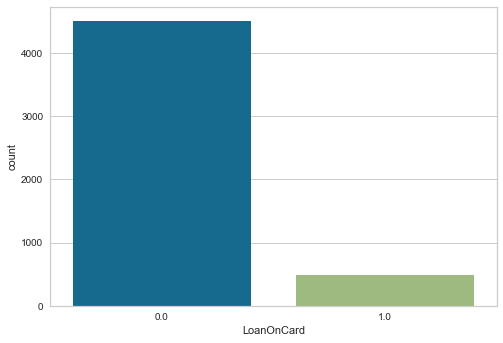

In [12]:
sns.countplot(x = 'LoanOnCard', data = df)

**The countplot above shows that the dataset target is highly imbalanced, techniques will be used in order to deal with this problem**

In [13]:
# Class target percentage
zero_class = len(df[df['LoanOnCard'] == 0])
one_class = len(df[df['LoanOnCard'] == 1])

print(f"Number of true cases: {one_class} ({(one_class / len(df)) * 100}%)")
print(f"Number of false cases: {zero_class} ({zero_class / len(df) * 100}%)")

Number of true cases: 480 (9.63855421686747%)
Number of false cases: 4500 (90.36144578313254%)


[None]

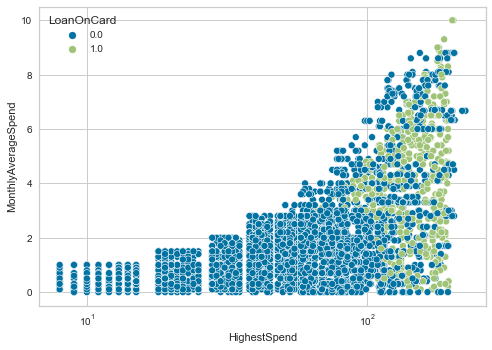

In [14]:
# Scatter plot to see how data points are distributed for each class
g = sns.scatterplot(x = 'HighestSpend', y='MonthlyAverageSpend', hue = 'LoanOnCard', data=df, legend='full')
g.set(xscale='log')

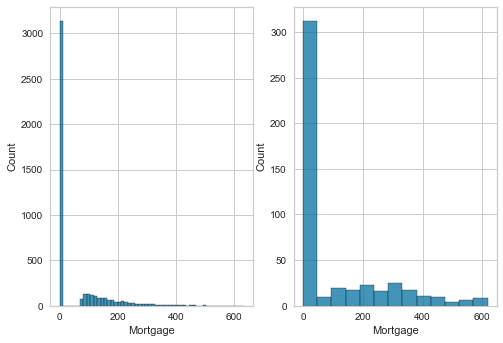

In [15]:
fig, ax = plt.subplots(1, 2)
sns.histplot(df.loc[df.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(df.loc[df.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

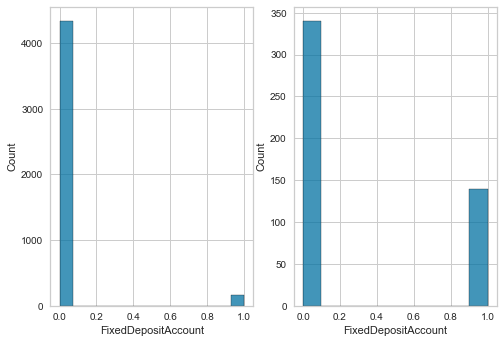

In [16]:
fig, ax = plt.subplots(1, 2)
sns.histplot(df.loc[df.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(df.loc[df.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
plt.show()

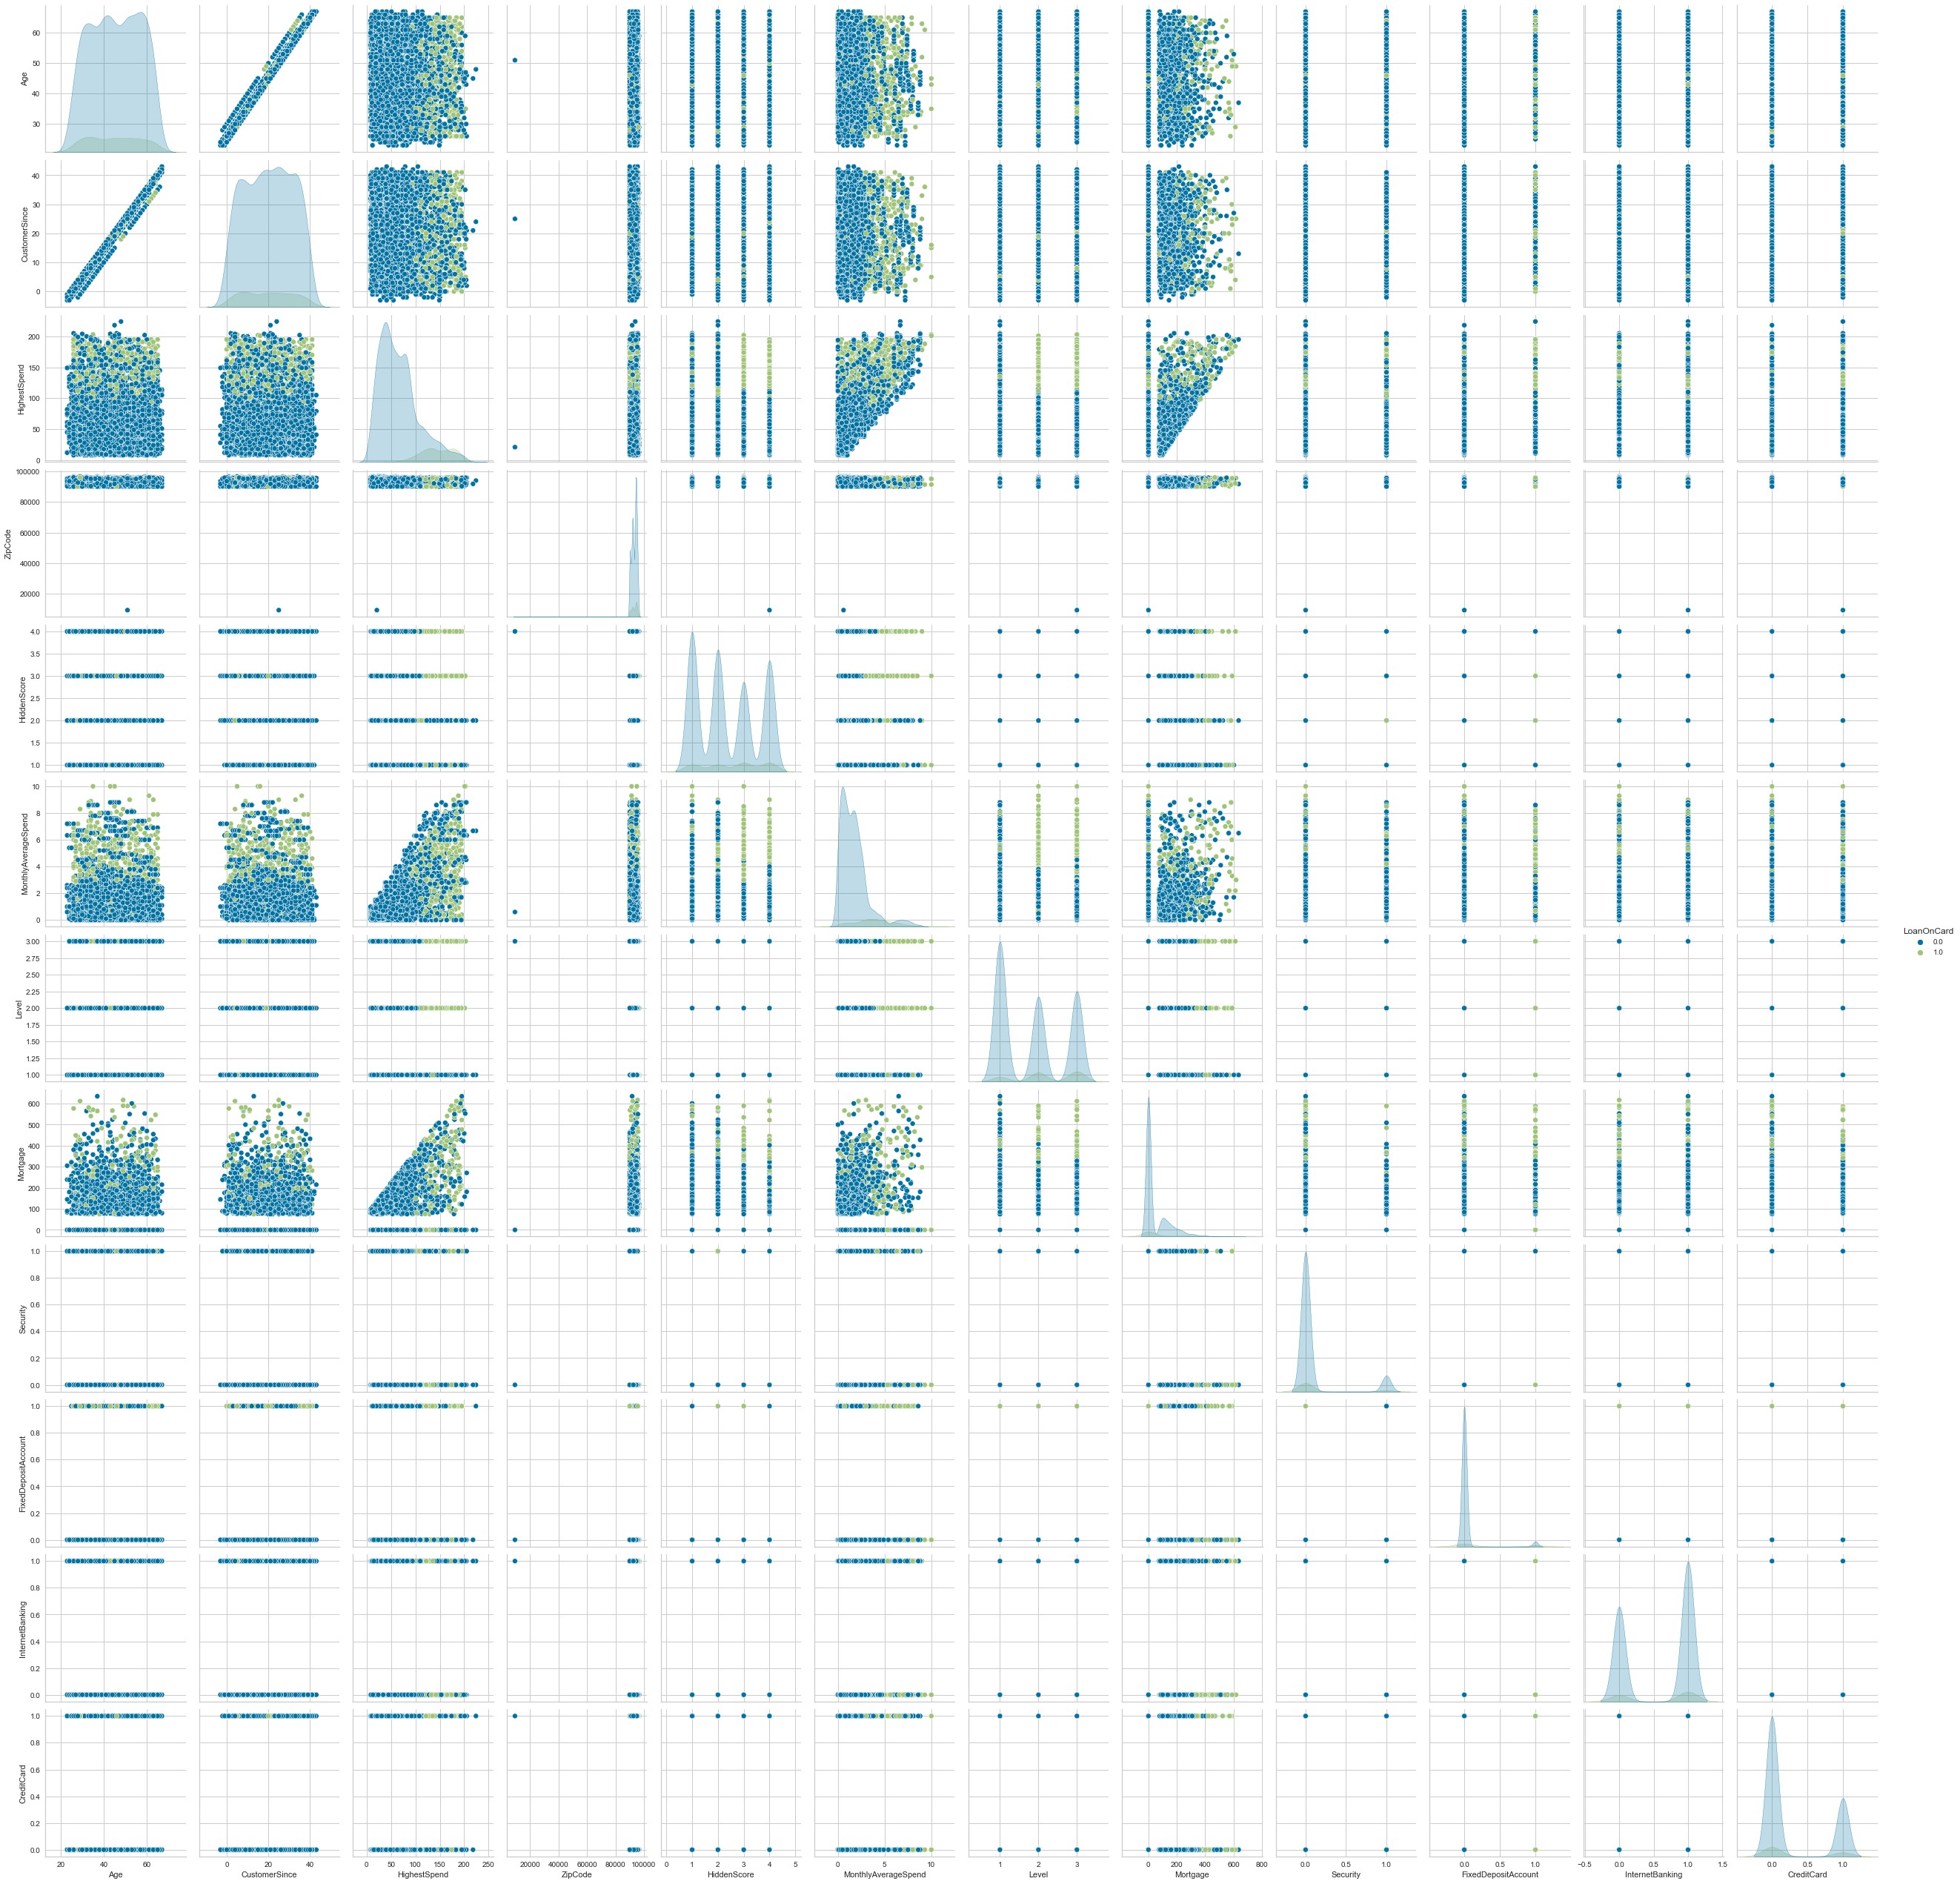

In [17]:
sns.pairplot(df, height=3, hue = 'LoanOnCard')

**The zipcode column will be dropped since it has no significance with other the columns**

In [18]:
df = df.drop(columns='ZipCode')

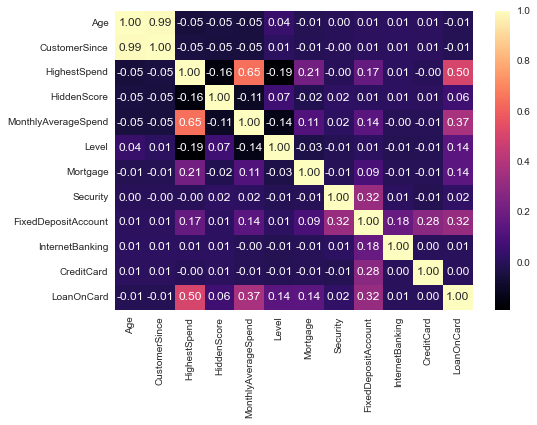

In [19]:
# Correlation Analysis 
sns.heatmap(df.corr(), annot=True, fmt= '.2f', cmap='magma')
plt.show()

**The correlation between Age and customerSince is very high, the age column will be dropped**

In [20]:
df = df.drop(columns='Age')

In [21]:
df

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,9,180,1,8.9,3,0,0,0,0,0,1.0
10,39,105,4,2.4,3,0,0,0,0,0,0.0
11,5,45,3,0.1,2,0,0,0,1,0,0.0
12,23,114,2,3.8,3,0,1,0,0,0,0.0
13,32,40,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,40,49,3,0.5,2,0,0,0,1,0,0.0


In [22]:
df.head(10)

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,9,180,1,8.9,3,0,0,0,0,0,1.0
10,39,105,4,2.4,3,0,0,0,0,0,0.0
11,5,45,3,0.1,2,0,0,0,1,0,0.0
12,23,114,2,3.8,3,0,1,0,0,0,0.0
13,32,40,4,2.5,2,0,0,0,1,0,0.0
14,41,112,1,2.0,1,0,1,0,0,0,0.0
15,30,22,1,1.5,3,0,0,0,1,1,0.0
16,14,130,4,4.7,3,134,0,0,0,0,1.0
17,18,81,4,2.4,1,0,0,0,0,0,0.0
18,21,193,2,8.1,3,0,0,0,0,0,1.0


# PyCaret Modeling

In [23]:
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

In [24]:
# Setup experiment
base = ClassificationExperiment()

In [25]:
base1 = base.setup(df, target = 'LoanOnCard', use_gpu = True, fold_strategy='stratifiedkfold', fold=5)

,Description,Value
0,Session id,1187
1,Target,LoanOnCard
2,Target type,Binary
3,Original data shape,"(4980, 11)"
4,Transformed data shape,"(4980, 11)"
5,Transformed train set shape,"(3485, 11)"
6,Transformed test set shape,"(1495, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


## Logistic Regression

In [26]:
lr = base1.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9555,0.9833,0.6567,0.8462,0.7395,0.7156,0.7225
1,0.9440,0.9581,0.5970,0.7692,0.6723,0.6422,0.6484
2,0.9541,0.9383,0.6269,0.8571,0.7241,0.6998,0.7100
3,0.9498,0.9579,0.5672,0.8636,0.6847,0.6587,0.6759
4,0.9426,0.9419,0.5882,0.7692,0.6667,0.6359,0.6427
Mean,0.9492,0.9559,0.6072,0.8211,0.6975,0.6704,0.6799
Std,0.0052,0.0159,0.0313,0.0427,0.0291,0.0317,0.0320


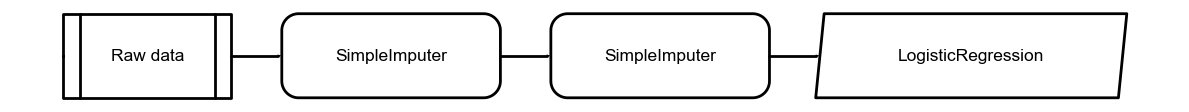

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
base1.evaluate_model(lr)

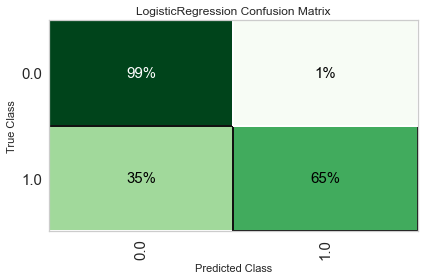

In [28]:
# evaluate model 
base1.plot_model(lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

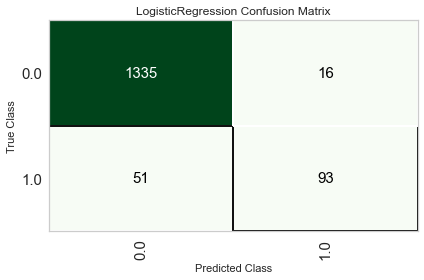

In [29]:
# evaluate model 
base1.plot_model(lr, plot = 'confusion_matrix')

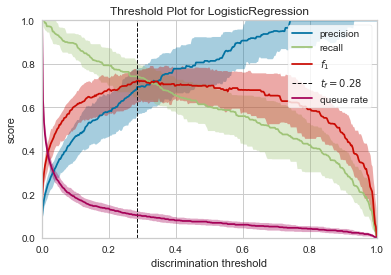

In [30]:
base1.plot_model(lr, plot = 'threshold')

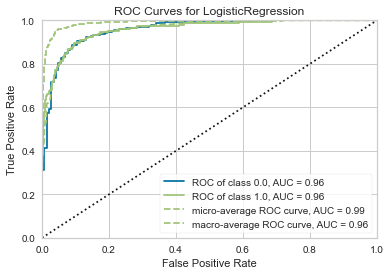

In [31]:
base1.plot_model(lr, 'auc')

In [32]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1187, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


***For the minority class, there is a high percentage of False Negatives within the model which causes the recall to drop off***

***To address this, there will be a weighted component added to this logistic regression model***

## Weighted Logistic Regression

In [33]:
w_lr = base1.create_model('lr', class_weight={0:1, 1:2})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9498,0.9826,0.7015,0.7581,0.7287,0.7011,0.7017
1,0.9369,0.9586,0.7313,0.6533,0.6901,0.6551,0.6564
2,0.9484,0.9386,0.7015,0.7460,0.7231,0.6946,0.6950
3,0.9527,0.9593,0.6567,0.8148,0.7273,0.7017,0.7066
4,0.9397,0.9439,0.7059,0.6857,0.6957,0.6622,0.6623
Mean,0.9455,0.9566,0.6994,0.7316,0.7130,0.6829,0.6844
Std,0.0061,0.0153,0.0241,0.0567,0.0166,0.0201,0.0209


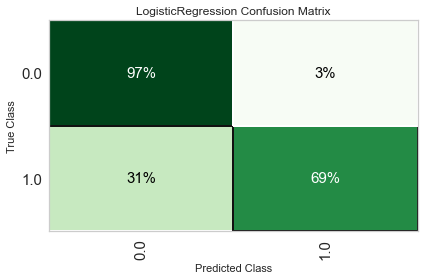

In [34]:
# evaluate model 
base1.plot_model(w_lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

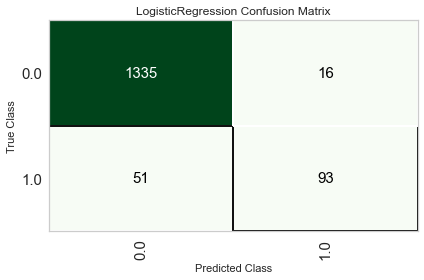

In [35]:
# evaluate model 
base1.plot_model(lr, plot = 'confusion_matrix')

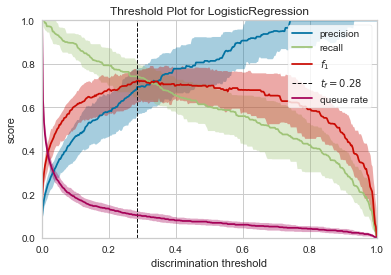

In [36]:
base1.plot_model(lr, plot = 'threshold')

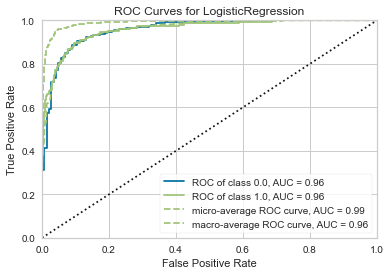

In [37]:
base1.plot_model(lr, 'auc')

***

## Naive Bayes

In [38]:
nb = base1.create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8953,0.9479,0.5821,0.4643,0.5166,0.4587,0.4623
1,0.8580,0.9118,0.5672,0.3519,0.4343,0.3581,0.3715
2,0.8809,0.9182,0.5522,0.4111,0.4713,0.4059,0.4115
3,0.8910,0.9226,0.5373,0.4444,0.4865,0.4261,0.4285
4,0.8795,0.9176,0.5882,0.4167,0.4878,0.4218,0.4298
Mean,0.8809,0.9236,0.5654,0.4177,0.4793,0.4141,0.4207
Std,0.0129,0.0126,0.0188,0.0381,0.0268,0.0328,0.0296


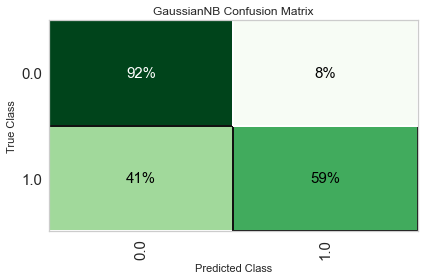

In [39]:
# evaluate model 
base1.plot_model(nb, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

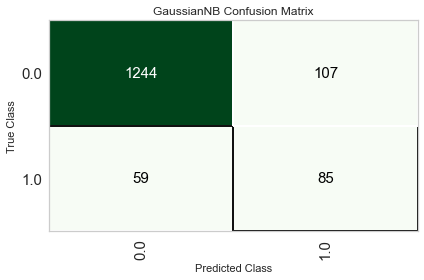

In [40]:
# evaluate model 
base1.plot_model(nb, plot = 'confusion_matrix')

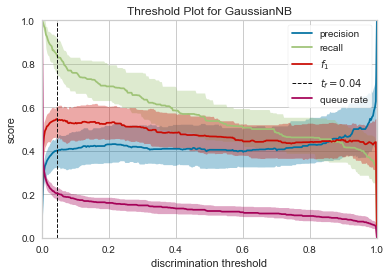

In [41]:
base1.plot_model(nb, plot = 'threshold')

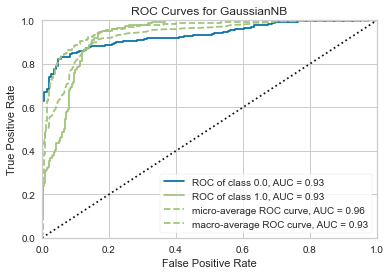

In [42]:
base1.plot_model(nb, 'auc')

***The naive bayes model under performs as there is a low recall score, in order to compensate for the imbalance of the classes, priors will be used in order to improve the models performance***

## Naive Bayes Priors

In [43]:
p_nb = base1.create_model('nb', priors=[0.1, 0.9])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8494,0.9479,1.0000,0.3895,0.5607,0.4901,0.5697
1,0.7805,0.9118,0.9403,0.2972,0.4516,0.3578,0.4509
2,0.8336,0.9182,0.8955,0.3550,0.5085,0.4300,0.4969
3,0.8235,0.9226,0.8955,0.3409,0.4938,0.4119,0.4827
4,0.8149,0.9176,0.9118,0.3351,0.4901,0.4053,0.4813
Mean,0.8204,0.9236,0.9286,0.3436,0.5009,0.4190,0.4963
Std,0.0230,0.0126,0.0393,0.0299,0.0353,0.0428,0.0397


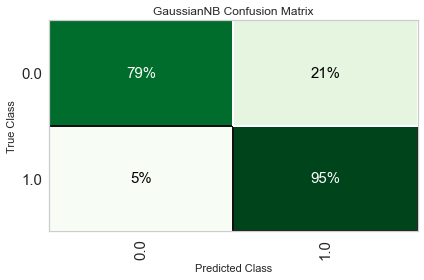

In [44]:
# evaluate model 
base1.plot_model(p_nb, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

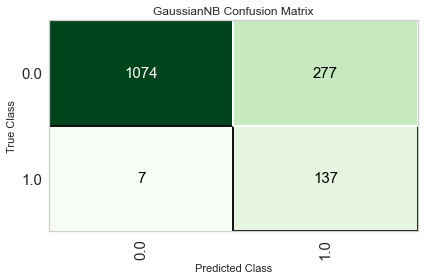

In [45]:
# evaluate model 
base1.plot_model(p_nb, plot = 'confusion_matrix')

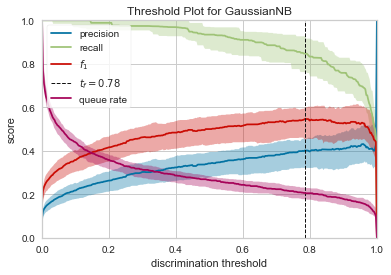

In [46]:
base1.plot_model(p_nb, plot = 'threshold')

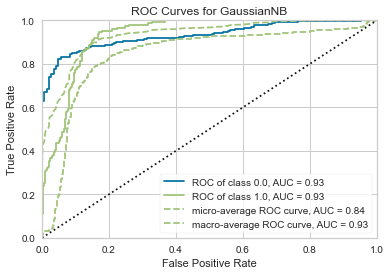

In [47]:
base1.plot_model(p_nb, 'auc')

***

## SVM - Support Vector Machine

In [48]:
svc = base1.create_model('rbfsvm', gamma=0.25, C=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9039,0.8945,0.0149,0.5000,0.0290,0.0235,0.0735
1,0.9039,0.8397,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8981,0.8611,0.0000,0.0000,0.0000,-0.0109,-0.0248
3,0.9067,0.8687,0.0448,0.7500,0.0845,0.0745,0.1685
4,0.9024,0.8294,0.0147,0.5000,0.0286,0.0231,0.0728
Mean,0.9030,0.8587,0.0149,0.3500,0.0284,0.0220,0.0580
Std,0.0028,0.0228,0.0164,0.3000,0.0309,0.0294,0.0677


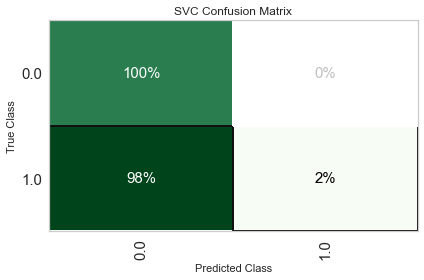

In [49]:
# evaluate model 
base1.plot_model(svc, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

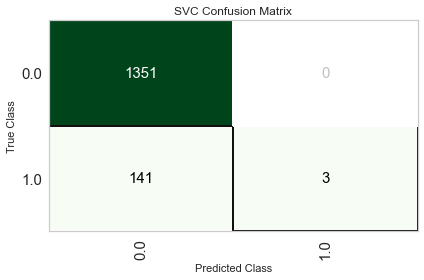

In [50]:
# evaluate model 
base1.plot_model(svc, plot = 'confusion_matrix')

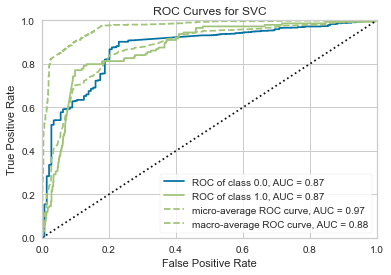

In [51]:
base1.plot_model(svc, 'auc')

## SVM Scaled

In [52]:
svm_setup = base.setup(df, target = 'LoanOnCard', use_gpu = True, fold_strategy='stratifiedkfold', fold=5, normalize=True) 

,Description,Value
0,Session id,2975
1,Target,LoanOnCard
2,Target type,Binary
3,Original data shape,"(4980, 11)"
4,Transformed data shape,"(4980, 11)"
5,Transformed train set shape,"(3485, 11)"
6,Transformed test set shape,"(1495, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [53]:
s_svc = svm_setup.create_model('rbfsvm', gamma=0.25, C=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9756,0.9911,0.8358,0.9032,0.8682,0.8548,0.8556
1,0.9756,0.9867,0.7910,0.9464,0.8618,0.8485,0.8526
2,0.9641,0.9793,0.7910,0.8281,0.8092,0.7894,0.7896
3,0.9684,0.9692,0.7910,0.8689,0.8281,0.8108,0.8119
4,0.9627,0.9699,0.7794,0.8281,0.8030,0.7824,0.7829
Mean,0.9693,0.9793,0.7977,0.8750,0.8341,0.8172,0.8185
Std,0.0055,0.0088,0.0196,0.0455,0.0267,0.0297,0.0306


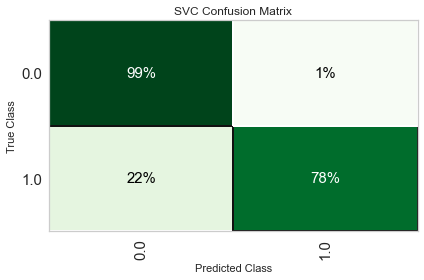

In [54]:
svm_setup.plot_model(s_svc, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

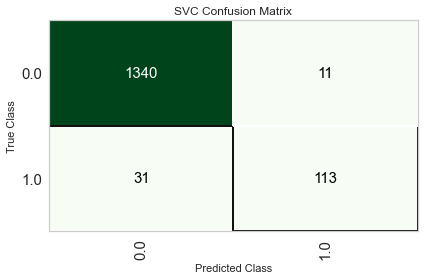

In [55]:
svm_setup.plot_model(s_svc, plot = 'confusion_matrix')

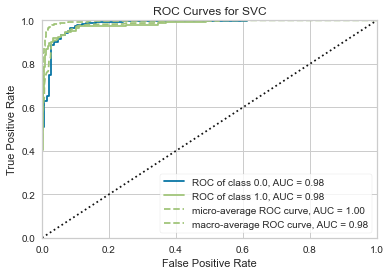

In [56]:
svm_setup.plot_model(s_svc, plot = 'auc')

***

## Decision Tree

In [57]:
dt = base1.create_model('dt', criterion='gini')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9799,0.9489,0.9104,0.8841,0.8971,0.8859,0.8861
1,0.9857,0.9721,0.9552,0.9014,0.9275,0.9196,0.9201
2,0.9799,0.9689,0.9552,0.8533,0.9014,0.8903,0.8920
3,0.9742,0.9390,0.8955,0.8451,0.8696,0.8552,0.8557
4,0.9684,0.9038,0.8235,0.8485,0.8358,0.8184,0.8185
Mean,0.9776,0.9465,0.9080,0.8665,0.8863,0.8739,0.8745
Std,0.0059,0.0246,0.0485,0.0223,0.0312,0.0344,0.0347


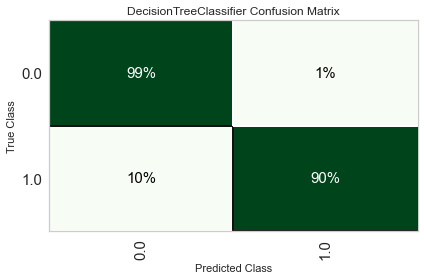

In [58]:
base1.plot_model(dt, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

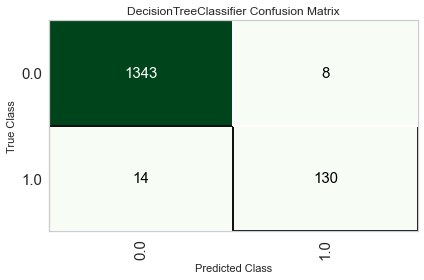

In [59]:
base1.plot_model(dt, plot = 'confusion_matrix')

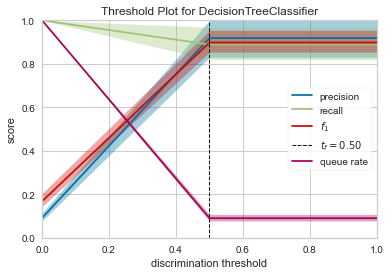

In [60]:
base1.plot_model(dt, plot = 'threshold')

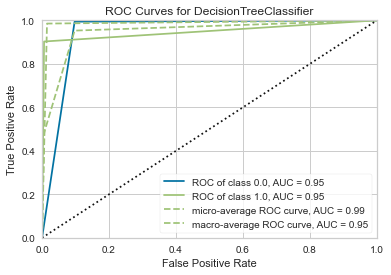

In [61]:
base1.plot_model(dt, 'auc')

***

## Random Forest

In [62]:
rf = base1.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9928,0.9980,0.9254,1.0000,0.9612,0.9573,0.9582
1,0.9900,0.9992,0.9254,0.9688,0.9466,0.9410,0.9413
2,0.9871,0.9960,0.8657,1.0000,0.9280,0.9209,0.9238
3,0.9813,0.9958,0.8507,0.9500,0.8976,0.8874,0.8890
4,0.9813,0.9964,0.8529,0.9508,0.8992,0.8890,0.8906
Mean,0.9865,0.9971,0.8840,0.9739,0.9265,0.9191,0.9206
Std,0.0046,0.0013,0.0341,0.0223,0.0253,0.0278,0.0274


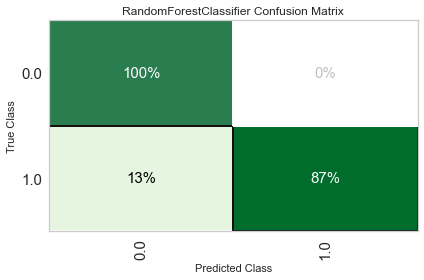

In [63]:
base1.plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

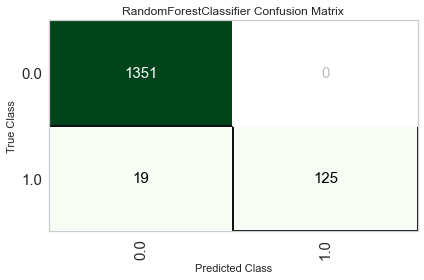

In [64]:
base1.plot_model(rf, plot = 'confusion_matrix')

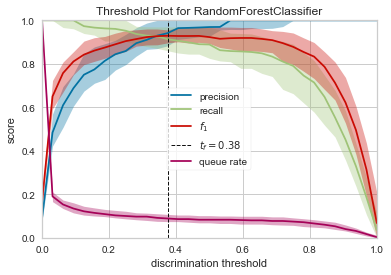

In [65]:
base1.plot_model(rf, plot = 'threshold')

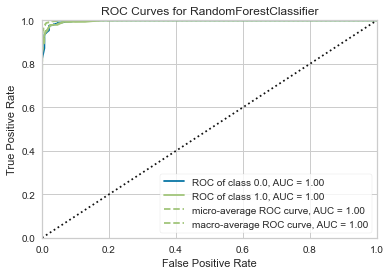

In [66]:
base1.plot_model(rf, 'auc')

# Dealing with Imbalance: Undersampling and Oversampling

**Due to the imbalance within the data, data sampling techniques will be implemented with the three best performing models**
1. SVM Scaled
2. Decision Tree
3. Random Forest

In [67]:
im_base = ClassificationExperiment()
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.over_sampling import SMOTE 

In [68]:
under_base = im_base.setup(df, target = 'LoanOnCard', use_gpu = True, fold_strategy='stratifiedkfold', fold=5, fix_imbalance_method=RUS(), fix_imbalance=True)

,Description,Value
0,Session id,2293
1,Target,LoanOnCard
2,Target type,Binary
3,Original data shape,"(4980, 11)"
4,Transformed data shape,"(2167, 11)"
5,Transformed train set shape,"(672, 11)"
6,Transformed test set shape,"(1495, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [69]:
over_base = im_base.setup(df, target = 'LoanOnCard', use_gpu = True, fold_strategy='stratifiedkfold', fold=5, fix_imbalance_method=SMOTE(), fix_imbalance=True)

,Description,Value
0,Session id,3858
1,Target,LoanOnCard
2,Target type,Binary
3,Original data shape,"(4980, 11)"
4,Transformed data shape,"(7793, 11)"
5,Transformed train set shape,"(6298, 11)"
6,Transformed test set shape,"(1495, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [70]:
under_best = under_base.compare_models(include = ['dt', 'rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9851,0.9970,0.9198,0.9264,0.9225,0.9142,0.9146,0.6720
dt,Decision Tree Classifier,0.9736,0.9375,0.8928,0.8442,0.8674,0.8528,0.8534,0.2900


In [71]:
over_best = over_base.compare_models(include = ['dt', 'rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9851,0.9970,0.9198,0.9264,0.9225,0.9142,0.9146,0.6780
dt,Decision Tree Classifier,0.9736,0.9375,0.8928,0.8442,0.8674,0.8528,0.8534,0.3000


### SVM SCALED OVER AND UNDER

In [72]:
svm_under = im_base.setup(df, target = 'LoanOnCard', use_gpu = True, fold_strategy='stratifiedkfold', fold=5, normalize=True, fix_imbalance=True, fix_imbalance_method=RUS()) 

,Description,Value
0,Session id,1872
1,Target,LoanOnCard
2,Target type,Binary
3,Original data shape,"(4980, 11)"
4,Transformed data shape,"(2167, 11)"
5,Transformed train set shape,"(672, 11)"
6,Transformed test set shape,"(1495, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [73]:
svm_over = im_base.setup(df, target = 'LoanOnCard', use_gpu = True, fold_strategy='stratifiedkfold', fold=5, normalize=True, fix_imbalance=True, fix_imbalance_method=SMOTE()) 

,Description,Value
0,Session id,4277
1,Target,LoanOnCard
2,Target type,Binary
3,Original data shape,"(4980, 11)"
4,Transformed data shape,"(7793, 11)"
5,Transformed train set shape,"(6298, 11)"
6,Transformed test set shape,"(1495, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [74]:
under_svm = svm_under.create_model('rbfsvm', gamma=0.1, C=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9613,0.9777,0.7313,0.8448,0.7840,0.7628,0.7652
1,0.9627,0.9876,0.7761,0.8254,0.8000,0.7795,0.7799
2,0.9627,0.9828,0.7463,0.8475,0.7937,0.7732,0.7751
3,0.9799,0.9950,0.8955,0.8955,0.8955,0.8844,0.8844
4,0.9727,0.9874,0.8235,0.8889,0.8550,0.8399,0.8407
Mean,0.9679,0.9861,0.7946,0.8604,0.8256,0.8080,0.8091
Std,0.0073,0.0058,0.0595,0.0271,0.0428,0.0467,0.0460


In [75]:
over_svm = svm_over.create_model('rbfsvm', gamma=0.1, C=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9613,0.9777,0.7313,0.8448,0.7840,0.7628,0.7652
1,0.9627,0.9876,0.7761,0.8254,0.8000,0.7795,0.7799
2,0.9627,0.9828,0.7463,0.8475,0.7937,0.7732,0.7751
3,0.9799,0.9950,0.8955,0.8955,0.8955,0.8844,0.8844
4,0.9727,0.9874,0.8235,0.8889,0.8550,0.8399,0.8407
Mean,0.9679,0.9861,0.7946,0.8604,0.8256,0.8080,0.8091
Std,0.0073,0.0058,0.0595,0.0271,0.0428,0.0467,0.0460


# Recap

**Out of all the models created, the random forest model with oversampling performed the best, scoring the highest among recall and precision**